## Data Preprocessing

In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# other
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score, classification_report, mean_squared_error
from sklearn.metrics import plot_confusion_matrix
from sklearn.compose import ColumnTransformer


# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# deal with warnings
import warnings
warnings.filterwarnings('ignore')



c:\Users\Teofilo_Ligawa\anaconda3\envs\teo-main_env\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
# loading the data
heart_df = pd.read_csv('data/cleaned_heart_disease_or_attack.csv', index_col=0)

# previewing the first five rows of the data
heart_df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40.0,1,0,0,0,0,...,1,0,5,18.0,15.0,1,0,9,4,3
1,0,0,0,0,25.0,1,0,0,1,0,...,0,1,3,0.0,0.0,0,0,7,6,1
2,0,1,1,1,28.0,0,0,0,0,1,...,1,1,5,30.0,30.0,1,0,9,4,8
3,0,1,0,1,27.0,0,0,0,1,1,...,1,0,2,0.0,0.0,0,0,11,3,6
4,0,1,1,1,24.0,0,0,0,1,1,...,1,0,2,3.0,0.0,0,0,11,5,4


In [3]:
# previewing the last five rows of the data
heart_df.tail()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
253675,0,1,1,1,45.0,0,0,0,0,1,...,1,0,3,0.0,5.0,0,1,5,6,7
253676,0,1,1,1,18.0,0,0,2,0,0,...,1,0,4,0.0,0.0,1,0,11,2,4
253677,0,0,0,1,28.0,0,0,0,1,1,...,1,0,1,0.0,0.0,0,0,2,5,2
253678,0,1,0,1,23.0,0,0,0,0,1,...,1,0,3,0.0,0.0,0,1,7,5,1
253679,1,1,1,1,25.0,0,0,2,1,1,...,1,0,2,0.0,0.0,0,0,9,6,2


In [4]:
# getting the data info
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229781 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  229781 non-null  int64  
 1   HighBP                229781 non-null  int64  
 2   HighChol              229781 non-null  int64  
 3   CholCheck             229781 non-null  int64  
 4   BMI                   229781 non-null  float64
 5   Smoker                229781 non-null  int64  
 6   Stroke                229781 non-null  int64  
 7   Diabetes              229781 non-null  int64  
 8   PhysActivity          229781 non-null  int64  
 9   Fruits                229781 non-null  int64  
 10  Veggies               229781 non-null  int64  
 11  HvyAlcoholConsump     229781 non-null  int64  
 12  AnyHealthcare         229781 non-null  int64  
 13  NoDocbcCost           229781 non-null  int64  
 14  GenHlth               229781 non-null  int64  
 15  

In [5]:
heart_df.BMI.value_counts().index.sort_values(ascending=False).tolist()

[98.0,
 96.0,
 95.0,
 92.0,
 91.0,
 90.0,
 89.0,
 88.0,
 87.0,
 86.0,
 85.0,
 84.0,
 83.0,
 82.0,
 81.0,
 80.0,
 79.0,
 78.0,
 77.0,
 76.0,
 75.0,
 74.0,
 73.0,
 72.0,
 71.0,
 70.0,
 69.0,
 68.0,
 67.0,
 66.0,
 65.0,
 64.0,
 63.0,
 62.0,
 61.0,
 60.0,
 59.0,
 58.0,
 57.0,
 56.0,
 55.0,
 54.0,
 53.0,
 52.0,
 51.0,
 50.0,
 49.0,
 48.0,
 47.0,
 46.0,
 45.0,
 44.0,
 43.0,
 42.0,
 41.0,
 40.0,
 39.0,
 38.0,
 37.0,
 36.0,
 35.0,
 34.0,
 33.0,
 32.0,
 31.0,
 30.0,
 29.0,
 28.0,
 27.0,
 26.0,
 25.0,
 24.0,
 23.0,
 22.0,
 21.0,
 20.0,
 19.0,
 18.0,
 17.0,
 16.0,
 15.0,
 14.0,
 13.0,
 12.0]

In [6]:
# renaming feature HeartDiseaseorAttack to target
heart_df.rename(columns={'HeartDiseaseorAttack': 'target',},
          inplace=True, errors='raise')

# checking the column names
heart_df.columns.tolist()

['target',
 'HighBP',
 'HighChol',
 'CholCheck',
 'BMI',
 'Smoker',
 'Stroke',
 'Diabetes',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'AnyHealthcare',
 'NoDocbcCost',
 'GenHlth',
 'MentHlth',
 'PhysHlth',
 'DiffWalk',
 'Sex',
 'Age',
 'Education',
 'Income']

In [7]:
# splitting the data into predictor and response variables
X = heart_df.drop('target', axis=1)
y = heart_df['target']

In [8]:
# splitting the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# previewing the shapes of the data
for item in [X_train, X_test, y_train, y_test]:
    print(f"{item.shape}")

# checking the value counts of the target variable for imbalance
for element in [y_train, y_test]:
    print(f"{element.value_counts()}")

(160846, 21)
(68935, 21)
(160846,)
(68935,)
0    144217
1     16629
Name: target, dtype: int64
0    61847
1     7088
Name: target, dtype: int64


There is an issue of class imbalance and we shall deal with it

In [9]:
# loading the SMOTE class
from imblearn.over_sampling import SMOTE

# Instantiating smote
smote = SMOTE()

# Fitting smote
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [10]:
# previewing shape of the target variable before and after resampling
for item in [y_train, y_train_resampled]:
    print(f"{item.value_counts()}")

0    144217
1     16629
Name: target, dtype: int64
0    144217
1    144217
Name: target, dtype: int64


## Modelling

In [11]:
# separating columns for transformation
cols_trans = X_train[['PhysHlth', 'MentHlth', 'BMI']]
cols_trans_test = X_test[['PhysHlth', 'MentHlth', 'BMI']]

In [12]:
# cols to transform
min_scaler = MinMaxScaler()

std_scaler = StandardScaler()

cols_trans[['PhysHlth', 'MentHlth']] = min_scaler.fit_transform(cols_trans[['PhysHlth', 'MentHlth']])
cols_trans_test[['PhysHlth', 'MentHlth']] = min_scaler.fit_transform(cols_trans_test[['PhysHlth', 'MentHlth']])
cols_trans[['BMI']] = std_scaler.fit_transform(cols_trans[['BMI']])
cols_trans_test[['BMI']] = std_scaler.fit_transform(cols_trans_test[['BMI']])
cols_trans

,PhysHlth,MentHlth,BMI
230811,0.000000,0.000000,-0.837690
92523,0.000000,0.000000,0.337612
223516,0.000000,0.000000,1.219088
524,0.000000,0.000000,-0.543865
58326,0.000000,0.000000,-1.131516
...,...,...,...
128914,0.000000,0.666667,-1.425341
110923,0.000000,0.000000,-0.543865
142328,0.166667,0.000000,-0.396952
159396,0.666667,0.333333,0.484525


In [13]:
X_train[['PhysHlth', 'MentHlth', 'BMI']] = cols_trans
X_test[['PhysHlth', 'MentHlth', 'BMI']] = cols_trans_test

In [14]:
# Initialze the estimators
lr = LogisticRegression(random_state=42)
dt = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier()
rf = RandomForestClassifier(random_state=42)
grad_boost = GradientBoostingClassifier(random_state=42)
ada_boost = AdaBoostClassifier(random_state=42)
xg_boost = XGBClassifier(random_state=42)

In [15]:
# preprocessing using a column transformer
ct= ColumnTransformer([
    ('min_max_scaler', MinMaxScaler(), ['PhysHlth', 'MentHlth']),
    ('standard_scaler', StandardScaler(), ['BMI'])
])

In [16]:
ct.__dict__

{'transformers': [('min_max_scaler', MinMaxScaler(), ['PhysHlth', 'MentHlth']),
  ('standard_scaler', StandardScaler(), ['BMI'])],
 'remainder': 'drop',
 'sparse_threshold': 0.3,
 'n_jobs': None,
 'transformer_weights': None,
 'verbose': False,
 'verbose_feature_names_out': True}

In [18]:
# creating a pipeline
pipe = Pipeline([
    ('preprocessor', ct),
    ('clf', lr)
])

# creating parameter grids for all  the classifiers

# logistic regression parameter grid
lr_grid = {
    'clf__penalty': ['l1', 'l2'],
    'clf__C': [1, 10, 100],
    'clf__class_weight':['balanced', 'auto'],
    'clf__solver': ['liblinear', 'lbfgs'],
    'clf': [lr]
}

# decision tree parameter grid
dt_grid = {
    'clf__criterion': ['gini', 'entropy'],
    'clf__max_depth': [2, 10, None],
    'clf__min_samples_split': [1, 5, 10],
    'clf__min_samples_leaf': [1, 2, 5],
    'clf__class_weight': ['auto', 'balanced'],
    'clf': [dt]
}

# Knn parameter grid
knn_grid = {
    'clf__n_neighbors':[3, 7, 9],
    'clf__weights':['uniform', 'distance'],
    'clf__metric':['minkowski', 'manhattan'],
    'clf': [knn]
}

# random forest parameter grid
rf_grid = {
    'clf__n_estimators': [100, 250],
    'clf__criterion': ['gini', 'entropy'],
    'clf__max_depth': [5, 10, 40],
    'clf': [rf] 
}

# Gradient boost parameter grid
grad_boost_grid = {
    'clf__n_estimators': [100, 250],
    'clf__learning_rate':[0.1, 0.2],
    'clf__max_depth': [3, 10, 40],
    'clf': [grad_boost]
}

# Ada boost parameter grid
ada_boost_grid = {
    'clf__n_estimators': [100, 250],
    'clf__learning_rate': [0.1, 0.2, 0.8],
    'clf': [ada_boost]
}

# XG boost parameter grid
xg_boost_grid = {
    'clf__n_estimators': [100, 250],
    'clf__max_depth': [5, 10, 25],
    'clf__learning_rate': [0.1, 0.2, 0.8],
    'clf': [xg_boost]
}


In [32]:
# defining the overall parameter grid
params = [lr_grid, dt_grid, knn_grid, rf_grid, grad_boost_grid, ada_boost, xg_boost_grid]



In [19]:
# Using grid search
gs = GridSearchCV(estimator = pipe,
                  param_grid = params,
                  scoring = 'accuracy',
                  cv = 5,
                  n_jobs=-1)

# fitting the grid search to the data
gs.fit(X_train, y_train)

In [ ]:
# calculating the test score
gs.score(X_test, y_test)

0.8971204758105462

In [ ]:
# getting the best parameters
gs.best_params_

{'clf': RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=250,
                        random_state=42),
 'clf__criterion': 'gini',
 'clf__max_depth': 10,
 'clf__min_samples_leaf': 1,
 'clf__min_samples_split': 5,
 'clf__n_estimators': 250}

In [ ]:
pre_process_pipe = Pipeline([('preprocessor', ct)])

In [27]:
# creating a pipe of the best parameters
pipe_best = Pipeline([
    ('clf', RandomForestClassifier(random_state=42,
                                   criterion='gini',
                                   min_samples_leaf=1,
                                   min_samples_split=5,
                                   n_estimators=250,
                                   max_depth=10))
])

# fitting the pipe to the data
pipe_best.fit(X_train, y_train)



Pipeline(steps=[('clf',
                 RandomForestClassifier(max_depth=10, min_samples_split=5,
                                        n_estimators=250, random_state=42))])

In [28]:
# calculating the test score
pipe_best.score(X_test, y_test)

0.8995720606368318

In [25]:
#function to evaluate the model and return the score
def model_eval(model, X_tr, y_tr, X_te, y_te):
    pred = model.predict(X_te)
    precision =precision_score(y_te, pred)
    recall =recall_score(y_te, pred)
    accuracy =accuracy_score(y_te, pred)
    f1 = f1_score(y_te, pred)
    
    return {'precision':precision,
            'recall_score':recall,
            'accuracy_score':accuracy,
            'f1_score':f1}

In [29]:
model_eval(pipe_best, X_train, y_train, X_test, y_test)

{'precision': 0.6736842105263158,
 'recall_score': 0.045146726862302484,
 'accuracy_score': 0.8995720606368318,
 'f1_score': 0.08462250429723654}

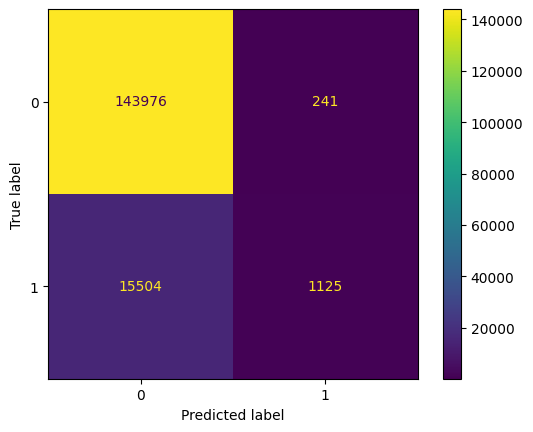

In [29]:
plot_confusion_matrix(pipe_best, X_train, y_train)
plt.show()

In [30]:
log_reg = LogisticRegression()

# fit the model
log_reg.fit(X_train, y_train)

LogisticRegression()

In [31]:
# saving the model using pickle
import pickle

In [33]:
filename = 'final_model.sav'
pickle.dump(pipe_best, open(filename, 'wb'))

# loading the saved model
loaded_model = pickle.load(open('final_model.sav', 'rb'))

In [ ]:
X_train.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
       'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth',
       'DiffWalk', 'Sex', 'Age', 'Education', 'Income'],
      dtype='object')

In [34]:
input_data = [1, 1, 1, 40, 1, 0, 0, 0, 0, 1, 0, 1, 0, 5, 18, 15,	1, 0, 9, 4, 3]
test_2 = [1,	1,	1,	30,	1,	0,	2,	0,	1,	1,	0,	1,	0,	5,	30,	30,	1,	0,	9,	5,	1]
# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(test_2)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = pipe_best.predict(input_data_reshaped)
accuracy = pipe_best.score(input_data_reshaped, prediction)
print(prediction)

if (prediction[0] == 0):
  print('The person does not have heart disease')
else:
  print('The person has heart disease')

[0]
The person does not have heart disease


### Conclusion

* The risk of heart disease increase with an increase in BMI and cholestrol levels
* Those who did not see a doctor because of cost are more likely to have a heart disease.
* The risk of a heart disease increases with an increase in weight.
* The risk of a heart disease increases with an increase in age.
* The risk of a heart disease increases slightly with an increase in the amount of annual income. This may be due to the ability to buy 'better' food and goods that is likely refined and thus contributes to this kind of situation.
* It is quite astonishng that those who take at least fruits and veggies once per day relatively show a higher possibility of having a heart disease or attack.
* The probability of having a heart disease increases with an increase in the number of days a person said they did not feel well either mentally or physically.


The study feels that more work could be done on the model to improve the precision and recall and generally just the performance of the model.